In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# New Section

In [ ]:
df = pd.read_csv('/content/Final Transactions.csv')
df.head(20)


,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596.0,3156.0,533.07,31.0,0.0,0.0,0.0
1,1,1,2023-01-01 00:02:10,4961.0,3412.0,808.56,130.0,0.0,0.0,0.0
2,2,2,2023-01-01 00:07:56,2.0,1365.0,1442.94,476.0,0.0,1.0,1.0
3,3,3,2023-01-01 00:09:29,4128.0,8737.0,620.65,569.0,0.0,0.0,0.0
4,4,4,2023-01-01 00:10:34,927.0,9906.0,490.66,634.0,0.0,0.0,0.0
5,5,5,2023-01-01 00:10:45,568.0,8803.0,401.17,645.0,0.0,0.0,0.0
6,6,6,2023-01-01 00:11:30,2803.0,5490.0,938.54,690.0,0.0,0.0,0.0
7,7,7,2023-01-01 00:11:44,4684.0,2486.0,206.53,704.0,0.0,0.0,0.0
8,8,8,2023-01-01 00:11:53,4128.0,8354.0,253.47,713.0,0.0,0.0,0.0
9,9,9,2023-01-01 00:13:44,541.0,6212.0,555.63,824.0,0.0,0.0,0.0


## **Exploratory Data Analysis**

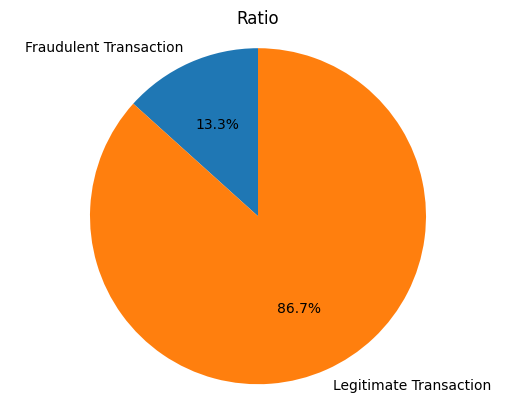

61748
401864


In [ ]:

count1 = 0
count2 = 0

for i in df['TX_FRAUD'].values:
  if i == 1:
    count1 += 1
  else:
    count2 += 1


# Create a pie chart
labels = ['Fraudulent Transaction', 'Legitimate Transaction']
sizes = [count1, count2]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Ratio')
plt.show()
print(count1)
print(count2)


The dataset is **imbalance**

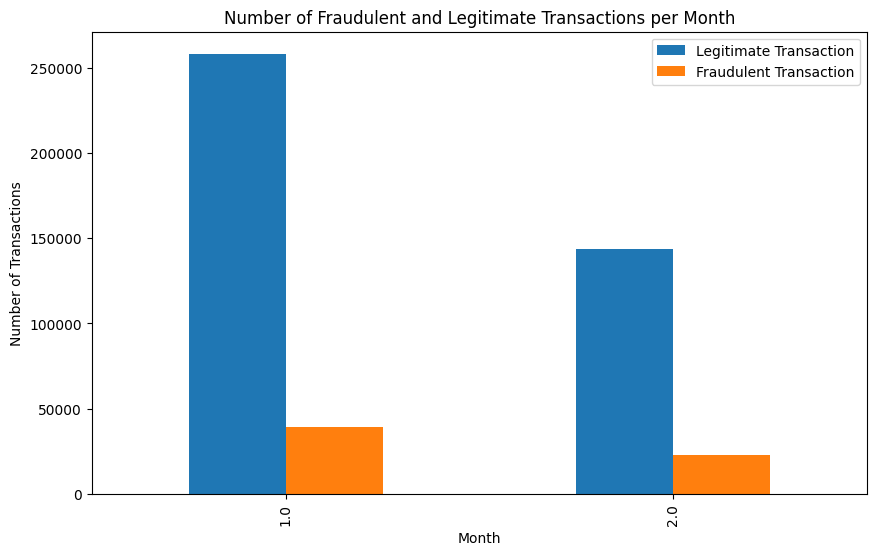

In [ ]:

# Convert 'TX_DATETIME' to datetime objects
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Extract the month from 'TX_DATETIME'
df['Month'] = df['TX_DATETIME'].dt.month

# Group by month and TX_FRAUD and count the occurrences
fraud_counts = df.groupby(['Month', 'TX_FRAUD'])['TX_FRAUD'].count().unstack()

# Create a bar chart
ax = fraud_counts.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Fraudulent and Legitimate Transactions per Month')
ax.legend(['Legitimate Transaction', 'Fraudulent Transaction'])
plt.show()


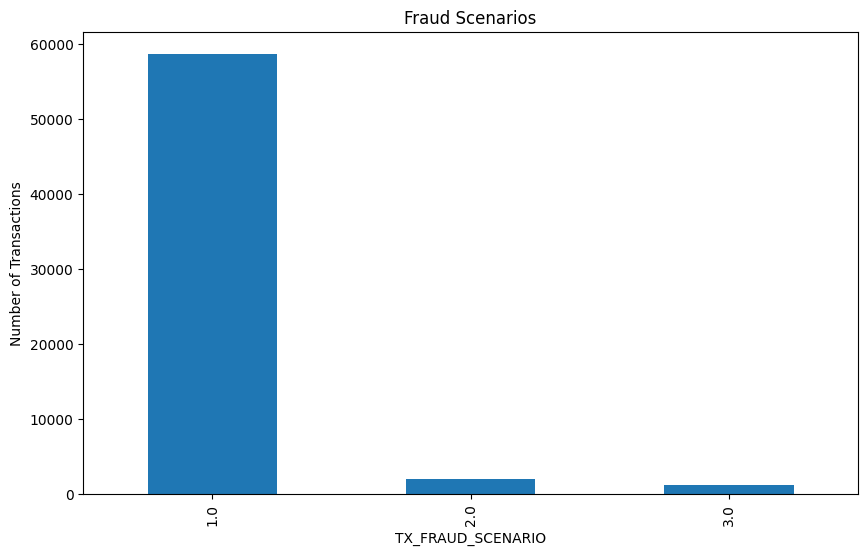

In [ ]:

# Filter out legitimate transactions
df_filtered = df[df['TX_FRAUD_SCENARIO'] != 0]

# Group by TX_FRAUD_SCENARIO and count the number of transactions
transaction_counts = df_filtered.groupby('TX_FRAUD_SCENARIO')['TX_FRAUD_SCENARIO'].count()

# Create a bar chart
ax = transaction_counts.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('TX_FRAUD_SCENARIO')
ax.set_ylabel('Number of Transactions')
ax.set_title('Fraud Scenarios')
plt.show()


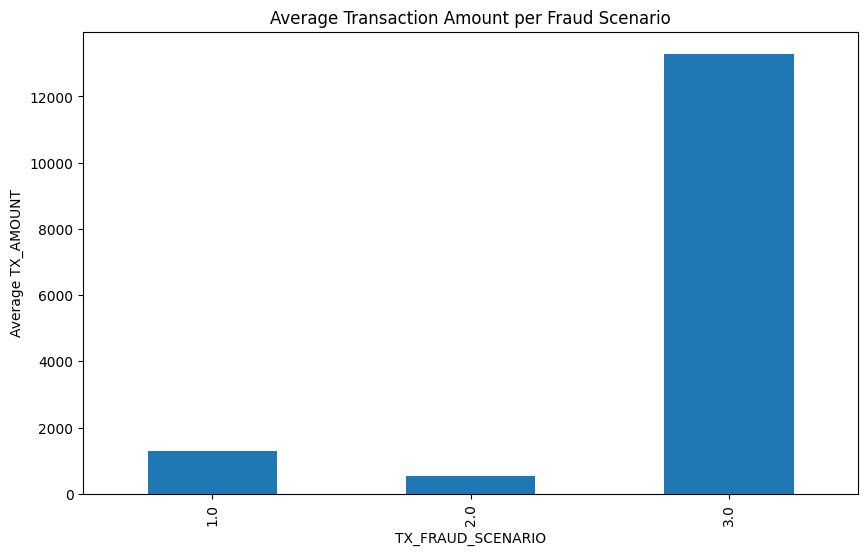

In [ ]:

# Group by TX_FRAUD_SCENARIO and calculate the average TX_AMOUNT
average_tx_amount = df_filtered.groupby('TX_FRAUD_SCENARIO')['TX_AMOUNT'].mean()
# Create a bar chart
ax = average_tx_amount.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('TX_FRAUD_SCENARIO')
ax.set_ylabel('Average TX_AMOUNT')
ax.set_title('Average Transaction Amount per Fraud Scenario')
plt.show()


We can observed that although scenario 3 has the least number of transaction, its transaction amount outstip the 2 others scenarios


In [ ]:


df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

df['date'] = df['TX_DATETIME'].dt.date

grouped = df[df['TX_FRAUD'] == 1].groupby('date').size().reset_index(name='count')

fig = px.line(grouped, x='date', y='count', labels={'date':'Date','count':'Number of Fraud Transactions'}, title='Number of fraudulent transactions over time')

fig.show()

Most: 2/2/2023 with 1414 fraudulent transactions.
Least: 2/1/2023 with 1182 fraudulent transactions

# **Cleaning Data**

In [ ]:
#Balancing data
df = pd.read_csv('/content/Final Transactions.csv')
df = df.drop(df.index[0])
fraud = df[df['TX_FRAUD'] == 1]
legit = df[df['TX_FRAUD'] == 0]
n_legit = fraud.sample(n=len(legit), replace=True)
df_unsampled = pd.concat([n_legit, legit])
df = df_unsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df.to_csv('cleaned_data.csv', index=False)


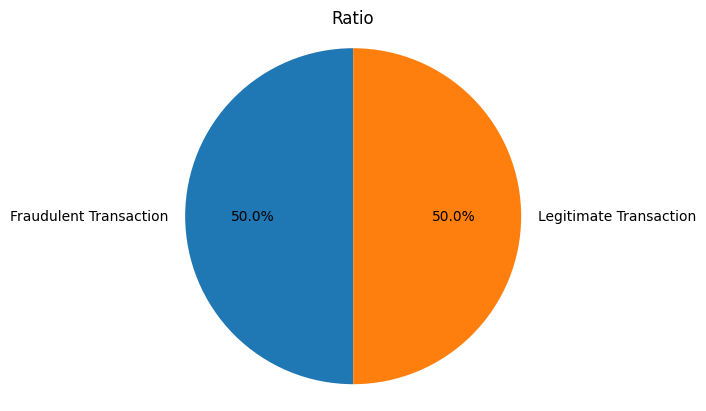

1290667
1290667


In [ ]:
df = df_unsampled
count1 = 0
count2 = 0

for i in df['TX_FRAUD'].values:
  if i == 1:
    count1 += 1
  else:
    count2 += 1


# Create a pie chart
labels = ['Fraudulent Transaction', 'Legitimate Transaction']
sizes = [count1, count2]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ratio')
plt.show()
print(count1)
print(count2)


# **Building a model**

In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')

#Extract only necessary features for training

df_featured = df[['TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']]


,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,208.39,3376985.0,39.0
1,1224.50,12050250.0,139.0
2,99.35,12469632.0,144.0
3,1320.24,1952289.0,22.0
4,1424.83,10483854.0,121.0


In [ ]:
#Next, we have to standardize the data using sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_featured)



array([[-0.45264543, -0.86434894, -0.85512257],
       [ 0.18278096,  1.37344836,  1.37409454],
       [-0.52083381,  1.4816535 ,  1.4855554 ],
       ...,
       [-0.34415312,  1.12765062,  1.12888066],
       [-0.19930284,  0.7843846 ,  0.79449809],
       [-0.11069672,  0.75413746,  0.74991375]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
X = df_scaled
Y = df['TX_FRAUD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

models = {"Linear Regression" : LinearRegression(),
         "K-Nearest Neighbors" : KNeighborsClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
         "Random Forest": RandomForestClassifier()}
for name,model in models.items():
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  if name == "Linear Regression":
    acc = mean_squared_error(Y_test, Y_pred)
    print(f"{name} mean squared error: {acc}")

  else:
    acc = accuracy_score(Y_test, Y_pred)
    print(f"{name} accuracy: {acc}")


Linear Regression mean squared error: 0.22249483930681696
K-Nearest Neighbors accuracy: 0.9888003688014148
Decision Tree accuracy: 0.9965618565587187
Random Forest accuracy: 0.9995661159826214


In [ ]:
#Linear Regression is not suitable since the problem is classification
#Chose Decision Tree and Random Forest


In [ ]:
#Optimising Decision Tree:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score

mod = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_search = GridSearchCV(mod, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, Y_test)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, Y_train)
Y_pred_DTC = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred_DTC)
cm = confusion_matrix(Y_test, Y_pred_DTC)
print('Decision Tree:')
print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{cm}")
precision_DTC = precision_score(Y_test, Y_pred_DTC)
recall_DTC = recall_score(Y_test, Y_pred_DTC)
f1_DTC = f1_score(Y_test, Y_pred_DTC)
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree:
Accuracy: 0.9966122180964501
Confusion Matrix:
[[256313   1692]
 [    57 258205]]
Decision Tree Classifier:
Precision:  0.9934897286232623
Recall:  0.9997792938953466
F1-Score:  0.9966245882055508


In [ ]:
#Random Forest:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred_RF = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred_RF)
cm = confusion_matrix(Y_test, Y_pred_RF)
print('Random Forest:')
print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{cm}")
precision_RF = precision_score(Y_test, Y_pred_RF)
recall_RF = recall_score(Y_test, Y_pred_RF)
f1_RF = f1_score(Y_test, Y_pred_RF)
print("Precision: ", precision_RF)
print("Recall: ", recall_RF)
print("F1-Score: ", f1_RF)


Random Forest:
Accuracy: 0.9995932337337076
Confusion Matrix:
[[257853    152]
 [    58 258204]]
Precision:  0.9994116645249191
Recall:  0.9997754218584228
F1-Score:  0.9995935100983706


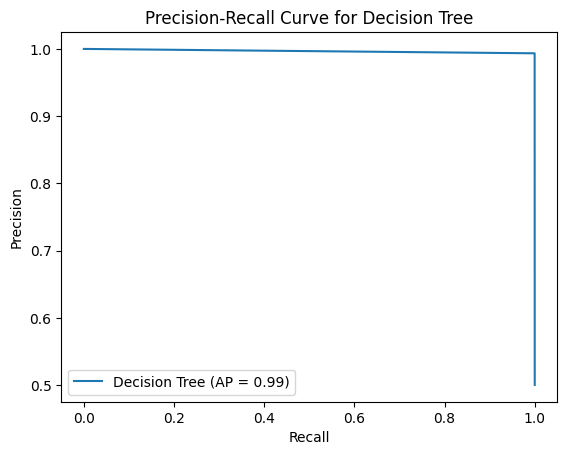

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_DTC)

# Calculate average precision score
average_precision = average_precision_score(Y_test, Y_pred_DTC)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Decision Tree (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc="lower left")
plt.show()


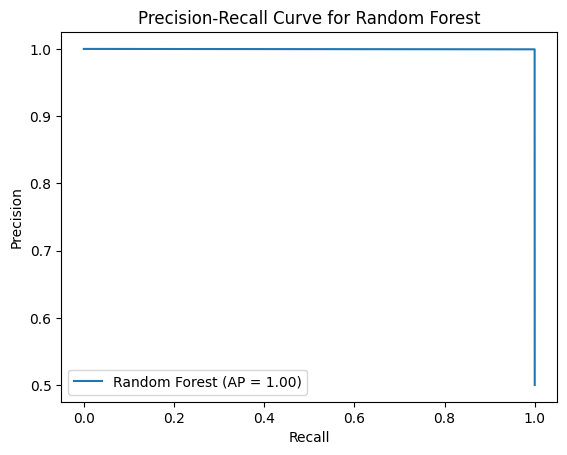

In [ ]:

import matplotlib.pyplot as plt
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_RF)

# Calculate average precision score
average_precision = average_precision_score(Y_test, Y_pred_RF)

# Plot the Precision-Recall curve
plt.plot(recall, precision, label='Random Forest (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="lower left")
plt.show()
